In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


provideniya ru
farafangana mg
kapaa us
maningrida au
nikolskoye ru
yabucoa us
katsuura jp
busselton au
castro cl
sitka us
punta arenas cl
kyaukse mm
vaini to
mataura pf
rikitea pf
douentza ml
mahebourg mu
ushuaia ar
busselton au
ponta do sol cv
lompoc us
puerto ayora ec
kaitangata nz
olafsvik is
yellowknife ca
nizhneyansk ru
arraial do cabo br
butaritari ki
puerto ayora ec
grand river south east mu
bethel us
guadalupe y calvo mx
khatanga ru
saint-philippe re
pevek ru
cape town za
dunayivtsi ua
rikitea pf
tiksi ru
mocuba mz
katsuura jp
lavrentiya ru
rikitea pf
aljezur pt
kiunga pg
northam au
vaini to
tabou ci
ginda er
cape town za
norman wells ca
airai pw
vostok ru
geraldton au
hermanus za
tasiilaq gl
narsaq gl
cape town za
dom pedrito br
pevek ru
amderma ru
biak id
port alfred za
lavrentiya ru
san patricio mx
albany au
krasnokamensk ru
carnarvon au
coquimbo cl
kozhevnikovo ru
airai pw
samusu ws
rikitea pf
kamenskoye ru
ushuaia ar
rikitea pf
rikitea pf
ushuaia ar
waterloo us
rikitea pf


hermanus za
burica pa
malumfashi ng
lavrentiya ru
albany au
rikitea pf
punta arenas cl
punta arenas cl
khatanga ru
moron mn
qaanaaq gl
hermanus za
port alfred za
mitchell us
ponta do sol cv
ketchikan us
yangambi cd
hithadhoo mv
lolua tv
ribeira grande pt
albany au
cazaje ao
ushuaia ar
manta ec
fairbanks us
avarua ck
tigil ru
ayagoz kz
skelleftea se
nevelsk ru
vila franca do campo pt
carnarvon au
nalut ly
general pico ar
hamilton bm
luderitz na
butaritari ki
locri it
ushuaia ar
ushuaia ar
punta arenas cl
mataura pf
carnarvon au
bethel us
atuona pf
kruisfontein za
butaritari ki
mataura pf
hofn is
bluff nz
ushuaia ar
port hawkesbury ca
hasaki jp
qaanaaq gl
sorland no
port alfred za
faanui pf
rikitea pf
tuktoyaktuk ca
punta arenas cl
arlit ne
tuensang in
port alfred za
ihosy mg
okhotsk ru
srednekolymsk ru
narsaq gl
ulaanbaatar mn
mataura pf
nikolskoye ru
sangar ru
kodiak us
georgetown sh
castro cl
bucerias mx
oktyabrskiy ru
airai pw
kuche cn
mount gambier au
barrow us
ushuaia ar
uyuni bo
u

arraial do cabo br
taolanaro mg
lexington us
barrow us
busselton au
beringovskiy ru
dali cn
boo se
lompoc us
clyde river ca
dikson ru
georgiyevka kz
rikitea pf
bambous virieux mu
karwar in
taolanaro mg
chifeng cn
vagur fo
ketchikan us
hobart au
yellowknife ca
kodinsk ru
camapua br
ribeira grande pt
los llanos de aridane es
busselton au
barentsburg sj
ushuaia ar
talnakh ru


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | farafangana
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | maningrida
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | yabucoa
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kyaukse
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | douentza
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 of Set 1 | olafsvi

Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | bargal
City not found. Skipping...
Processing Record 40 of Set 4 | sulina
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | vicksburg
Processing Record 43 of Set 4 | caravelas
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | cedar city
Processing Record 47 of Set 4 | romitan
Processing Record 48 of Set 4 | bandar
Processing Record 49 of Set 4 | baker city
Processing Record 50 of Set 4 | ankazoabo
Processing Record 1 of Set 5 | zhangye
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | sombrerete
Processing Record 5 of Set 5 | businga
Processing Record 6 of Set 5 | puerto del rosario
Processing Record 7 of S

Processing Record 22 of Set 8 | nevelsk
Processing Record 23 of Set 8 | nalut
Processing Record 24 of Set 8 | general pico
Processing Record 25 of Set 8 | locri
Processing Record 26 of Set 8 | hofn
Processing Record 27 of Set 8 | port hawkesbury
Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | arlit
Processing Record 30 of Set 8 | tuensang
Processing Record 31 of Set 8 | ihosy
Processing Record 32 of Set 8 | okhotsk
Processing Record 33 of Set 8 | ulaanbaatar
Processing Record 34 of Set 8 | sangar
Processing Record 35 of Set 8 | bucerias
Processing Record 36 of Set 8 | oktyabrskiy
Processing Record 37 of Set 8 | kuche
City not found. Skipping...
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | uyuni
Processing Record 40 of Set 8 | bonthe
Processing Record 41 of Set 8 | parana
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | cherskiy
Processing Record 44 of Set 8 | basco
Processing Record 45 of Set 8 | akdepe


Processing Record 11 of Set 12 | port augusta
Processing Record 12 of Set 12 | oum hadjer
Processing Record 13 of Set 12 | windsor
Processing Record 14 of Set 12 | nizhneudinsk
Processing Record 15 of Set 12 | krasnotorka
Processing Record 16 of Set 12 | kudahuvadhoo
Processing Record 17 of Set 12 | harper
Processing Record 18 of Set 12 | yian
City not found. Skipping...
Processing Record 19 of Set 12 | santa marta de tormes
Processing Record 20 of Set 12 | tungkang
City not found. Skipping...
Processing Record 21 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 12 | grand centre
City not found. Skipping...
Processing Record 23 of Set 12 | greenville
Processing Record 24 of Set 12 | kapasan
Processing Record 25 of Set 12 | ambilobe
Processing Record 26 of Set 12 | palana
Processing Record 27 of Set 12 | nagato
Processing Record 28 of Set 12 | kampot
Processing Record 29 of Set 12 | mount isa
Processing Record 30 of Set 12 | burgeo
Processing Record 31 of

In [9]:
len(city_data)

549

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,23.36,74,100,25.01,RU,2022-03-31 21:32:48
1,Farafangana,-22.8167,47.8333,73.60,83,23,7.11,MG,2022-03-31 21:32:49
2,Kapaa,22.0752,-159.3190,79.48,82,75,14.97,US,2022-03-31 21:32:50
3,Maningrida,-12.0667,134.2667,76.59,83,7,3.71,AU,2022-03-31 21:32:50
4,Nikolskoye,59.7035,30.7861,26.80,97,15,2.13,RU,2022-03-31 21:32:51
5,Yabucoa,18.0505,-65.8793,82.49,79,15,16.31,PR,2022-03-31 21:32:52
6,Katsuura,35.1333,140.3000,41.92,96,100,25.90,JP,2022-03-31 21:32:52
7,Busselton,-33.6500,115.3333,69.71,76,15,10.02,AU,2022-03-31 21:32:53
8,Castro,-24.7911,-50.0119,55.92,98,100,8.12,BR,2022-03-31 21:32:53
9,Sitka,57.0531,-135.3300,44.49,65,100,8.05,US,2022-03-31 21:32:54


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-03-31 21:32:48,64.3833,-173.3000,23.36,74,100,25.01
1,Farafangana,MG,2022-03-31 21:32:49,-22.8167,47.8333,73.60,83,23,7.11
2,Kapaa,US,2022-03-31 21:32:50,22.0752,-159.3190,79.48,82,75,14.97
3,Maningrida,AU,2022-03-31 21:32:50,-12.0667,134.2667,76.59,83,7,3.71
4,Nikolskoye,RU,2022-03-31 21:32:51,59.7035,30.7861,26.80,97,15,2.13
5,Yabucoa,PR,2022-03-31 21:32:52,18.0505,-65.8793,82.49,79,15,16.31
6,Katsuura,JP,2022-03-31 21:32:52,35.1333,140.3000,41.92,96,100,25.90
7,Busselton,AU,2022-03-31 21:32:53,-33.6500,115.3333,69.71,76,15,10.02
8,Castro,BR,2022-03-31 21:32:53,-24.7911,-50.0119,55.92,98,100,8.12
9,Sitka,US,2022-03-31 21:32:54,57.0531,-135.3300,44.49,65,100,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/31/22'

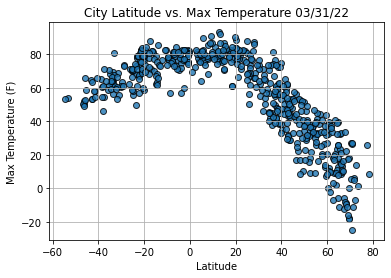

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

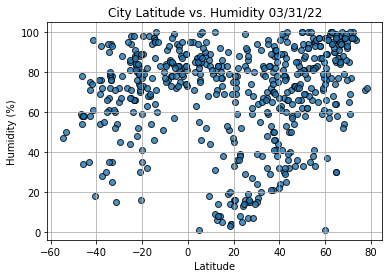

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

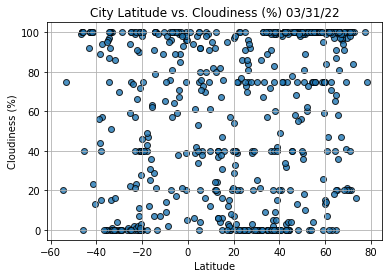

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

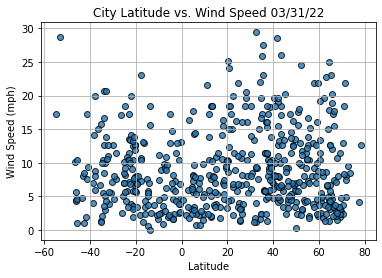

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-03-31 21:32:48,64.3833,-173.3000,23.36,74,100,25.01
2,Kapaa,US,2022-03-31 21:32:50,22.0752,-159.3190,79.48,82,75,14.97
4,Nikolskoye,RU,2022-03-31 21:32:51,59.7035,30.7861,26.80,97,15,2.13
5,Yabucoa,PR,2022-03-31 21:32:52,18.0505,-65.8793,82.49,79,15,16.31
6,Katsuura,JP,2022-03-31 21:32:52,35.1333,140.3000,41.92,96,100,25.90


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


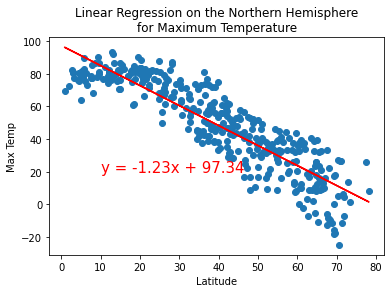

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere''\n'
                        'for Maximum Temperature', 'Max Temp',(10,20))

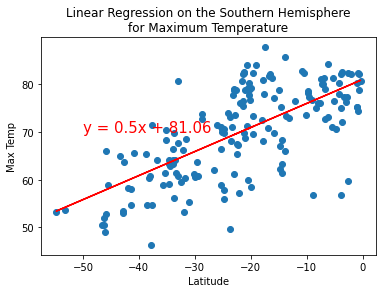

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere''\n'
                       'for Maximum Temperature', 'Max Temp',(-50,70))

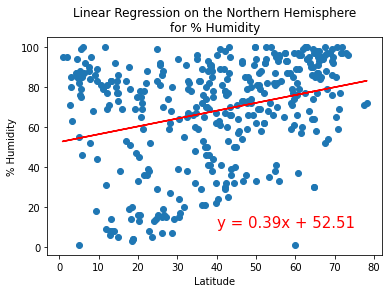

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(40,10))

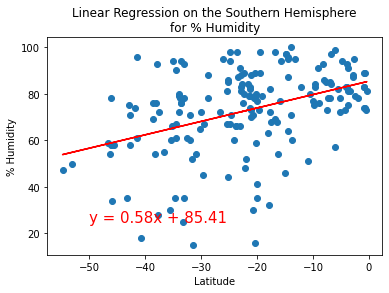

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(-50,25))

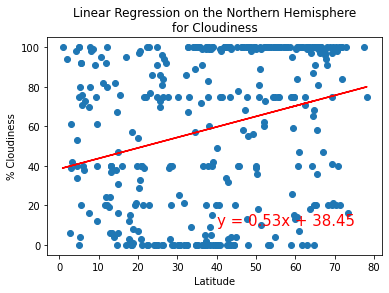

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Cloudiness', '% Cloudiness',(40,10))

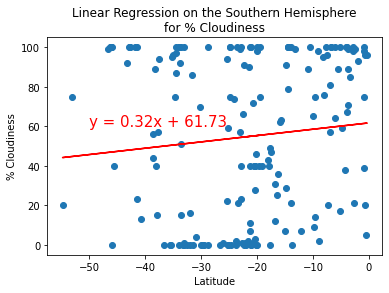

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

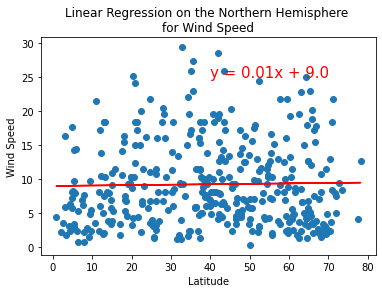

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere ''\n'
                        'for Wind Speed', 'Wind Speed',(40,25))


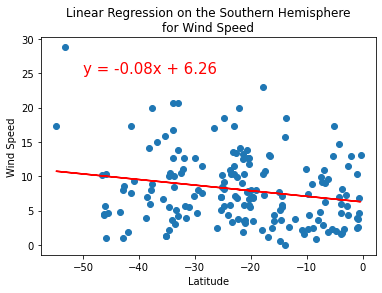

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(-50,25))